****CREDIT RISK PREDICTION***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
#preview of data--
data_preview = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\PROJECT_MAIN\data\accepted_2007_to_2018q4.csv\accepted_2007_to_2018Q4.csv",nrows=20)

data_preview.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [4]:
data_preview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 151 entries, id to settlement_term
dtypes: float64(125), int64(1), object(25)
memory usage: 23.7+ KB


Assumptions of Logistic Regression

-Linearity of the Logit

-Minimal Multicollinearity

-Independence of Observations

In [5]:
# Selecting few fetures for Logistic Regression--

selected_features = [# target variable-
                    'loan_status',
                    # loan attributes-
                    'loan_amnt', 'term', 'int_rate', 'installment',
                    # borrower attributes-
                    'annual_inc','emp_length', 'home_ownership','verification_status', 'purpose','addr_state',
                    # borrower's credit history-
                    'fico_range_low','fico_range_high','dti','open_acc','pub_rec','revol_util','inq_last_6mths',
                    'mort_acc','pub_rec_bankruptcies'
]
data = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\PROJECT_MAIN\data\accepted_2007_to_2018q4.csv\accepted_2007_to_2018Q4.csv",usecols=selected_features)
print(f"Dataset Shape: {data.shape}")
print(data.head)

Dataset Shape: (2260701, 20)
<bound method NDFrame.head of          loan_amnt        term  int_rate  installment emp_length  \
0           3600.0   36 months     13.99       123.03  10+ years   
1          24700.0   36 months     11.99       820.28  10+ years   
2          20000.0   60 months     10.78       432.66  10+ years   
3          35000.0   60 months     14.85       829.90  10+ years   
4          10400.0   60 months     22.45       289.91    3 years   
...            ...         ...       ...          ...        ...   
2260696    40000.0   60 months     10.49       859.56    9 years   
2260697    24000.0   60 months     14.49       564.56    6 years   
2260698    14000.0   60 months     14.49       329.33  10+ years   
2260699        NaN         NaN       NaN          NaN        NaN   
2260700        NaN         NaN       NaN          NaN        NaN   

        home_ownership  annual_inc verification_status  loan_status  \
0             MORTGAGE     55000.0        Not Verifie

In [6]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,mort_acc,pub_rec_bankruptcies
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06,2.260638e+06,2.260639e+06,2.260639e+06,2.258866e+06,2.210638e+06,2.259303e+06
mean,1.504693e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,6.985882e+02,7.025884e+02,5.768354e-01,1.161240e+01,1.975278e-01,5.033770e+01,1.555382e+00,1.281935e-01
std,9.190245e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,3.301038e+01,3.301124e+01,8.859632e-01,5.640861e+00,5.705150e-01,2.471307e+01,1.904981e+00,3.646130e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,6.750000e+02,6.790000e+02,0.000000e+00,8.000000e+00,0.000000e+00,3.150000e+01,0.000000e+00,0.000000e+00
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,6.900000e+02,6.940000e+02,0.000000e+00,1.100000e+01,0.000000e+00,5.030000e+01,1.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,7.150000e+02,7.190000e+02,1.000000e+00,1.400000e+01,0.000000e+00,6.940000e+01,3.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,8.450000e+02,8.500000e+02,3.300000e+01,1.010000e+02,8.600000e+01,8.923000e+02,9.400000e+01,1.200000e+01


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              float64
 3   installment           float64
 4   emp_length            object 
 5   home_ownership        object 
 6   annual_inc            float64
 7   verification_status   object 
 8   loan_status           object 
 9   purpose               object 
 10  addr_state            object 
 11  dti                   float64
 12  fico_range_low        float64
 13  fico_range_high       float64
 14  inq_last_6mths        float64
 15  open_acc              float64
 16  pub_rec               float64
 17  revol_util            float64
 18  mort_acc              float64
 19  pub_rec_bankruptcies  float64
dtypes: float64(13), object(7)
memory usage: 345.0+ MB


In [8]:
data.isnull().sum()

loan_amnt                   33
term                        33
int_rate                    33
installment                 33
emp_length              146940
home_ownership              33
annual_inc                  37
verification_status         33
loan_status                 33
purpose                     33
addr_state                  33
dti                       1744
fico_range_low              33
fico_range_high             33
inq_last_6mths              63
open_acc                    62
pub_rec                     62
revol_util                1835
mort_acc                 50063
pub_rec_bankruptcies      1398
dtype: int64

In [9]:
# Handling missing values for Logistic Regression--
# missing value<100-

columns_to_check = [
    'loan_amnt',
    'term', 
    'int_rate',
    'installment',
    'home_ownership',
    'annual_inc',
    'verification_status',
    'loan_status',
    'purpose',
    'addr_state',
    'fico_range_low',
    'fico_range_high',
    'inq_last_6mths',
    'open_acc',
    'pub_rec'
] 

data = data.dropna(subset=columns_to_check,how='any')

In [10]:
data.shape[0]

2260638

In [11]:
# For the remaining missing values--
# replacing the missing values in dti,revol_unit,pub_rec_bankruptcies:
data['dti'] = data['dti'].fillna(data['dti'].median())
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].median())

# replacing the mort_acc missing value with 0--
data['mort_acc'] = data['mort_acc'].fillna(0)
data['emp_length'] = data['emp_length'].fillna('unknown')

In [12]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

**Treatment of Missing Values**

1. **Dropped rows with critical missing data:** Rows missing values in essential columns (loan_amnt, term, int_rate, installment, home_ownership, annual_inc, verification_status, loan_status, purpose, addr_state, fico_range_low, fico_range_high, inq_last_6mths, open_acc, pub_rec) were dropped. This resulted in only 63 rows lost out of 2,260,701 (0.003% of data) - a negligible loss for data with fundamental quality issues.

2. **Median imputation for numeric features:** Missing values in dti, revol_util, and pub_rec_bankruptcies were filled with their respective medians. Median was chosen over mean as it is robust to outliers, which are common in financial data.

3. **mort_acc filled with 0:** Missing mortgage account values were filled with 0, assuming missing data indicates no mortgage accounts (common for renters and younger borrowers).

4. **emp_length filled with 'Unknown':** Missing employment length values were filled with 'Unknown' rather than dropping these rows or imputing with mode. This preserves the information that employment data was unavailable, which may itself be a signal (unemployment, self-employment, or data collection issues).

In [ ]:
# Understanding the target variable---
data['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [16]:
# Mapping 0 to paod loans and 1 to default or charged off loans--

map_loan_status = {'Fully Paid':0,
                   'Charged Off':1,
                   'Default':1,
                   'Does not meet the credit policy. Status:Fully Paid': 0,
                    'Does not meet the credit policy. Status:Charged Off': 1
                    }
data['loan_status_binary'] = data['loan_status'].map(map_loan_status)

data = data.dropna(subset=['loan_status_binary'])
data = data.drop('loan_status',axis=1)

In [17]:
data.shape[0]

1348069

In [18]:
data['loan_status_binary'].value_counts()

loan_status_binary
0.0    1078712
1.0     269357
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS--

C:\Users\user\AppData\Local\Temp\ipykernel_3224\1477493642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data,x='loan_status_binary',palette='viridis')


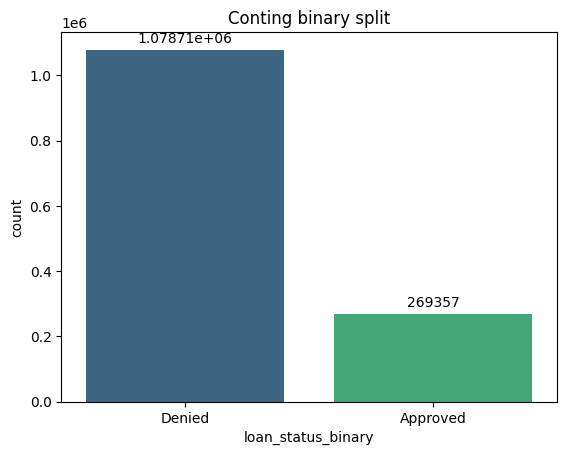

In [30]:
# Target class split--
ax = sns.countplot(data=data,x='loan_status_binary',palette='viridis')
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.xticks([0, 1], ['Denied', 'Approved']) 
plt.title('Conting binary split')
plt.show()

In [ ]:
# Histogram Grid for the numeric features--